c:\Users\jess_besnier\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


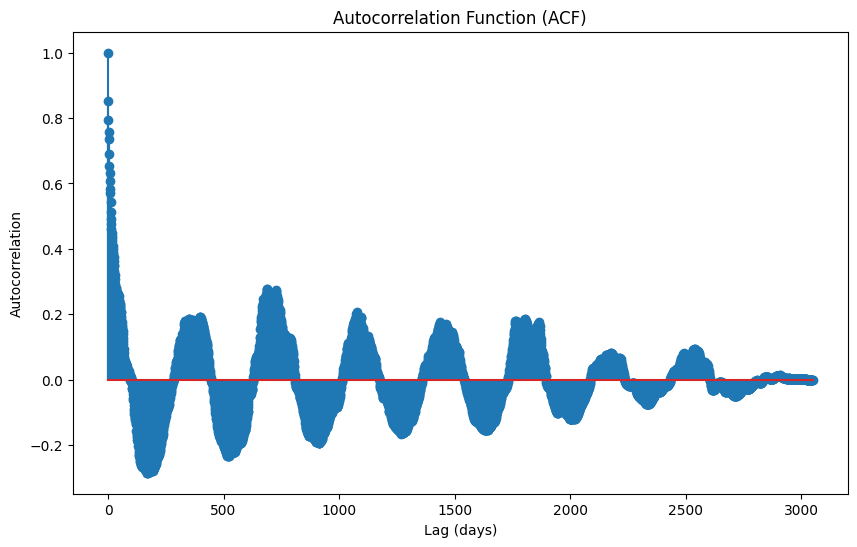

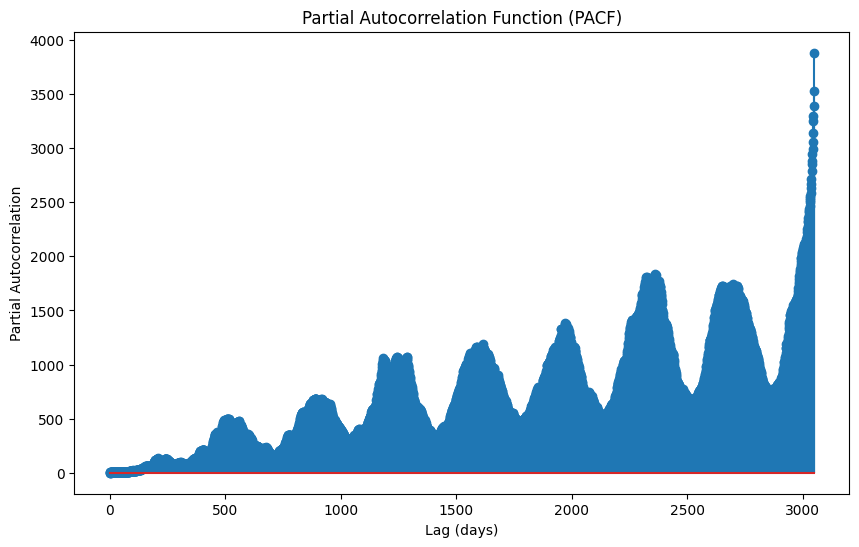

In [5]:
#rough autocorrelation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_acf_pacf(discharge):
    # Calculate autocorrelation values
    acf_values = np.correlate(discharge - discharge.mean(), discharge - discharge.mean(), mode='full')[-len(discharge):] / (discharge.var() * len(discharge))

    # Plot Autocorrelation Function (ACF)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.stem(range(len(acf_values)), acf_values, use_line_collection=True)
    ax.set_title('Autocorrelation Function (ACF)')
    ax.set_xlabel('Lag (days)')
    ax.set_ylabel('Autocorrelation')
    plt.show()

    # Calculate partial autocorrelation values
    pacf_values = np.correlate(discharge, discharge, mode='full')[:len(discharge)]

    # Plot Partial Autocorrelation Function (PACF)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.stem(range(len(pacf_values)), pacf_values, use_line_collection=True)
    ax.set_title('Partial Autocorrelation Function (PACF)')
    ax.set_xlabel('Lag (days)')
    ax.set_ylabel('Partial Autocorrelation')
    plt.show()

if __name__ == '__main__':
    data = pd.read_csv('C:/Users/jess_besnier/Documents/Ireland_summer_2023/ML_aspect/input_and_discharge_actual_mock.csv')
    df = data[['Timestamp', 'bp_discharge']]
    df['time'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y')
    df = df.drop('Timestamp', axis=1)
    df_n = df.dropna()
    
    discharge = df_n['bp_discharge'].values
    plot_acf_pacf(discharge)


c:\Users\jess_besnier\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


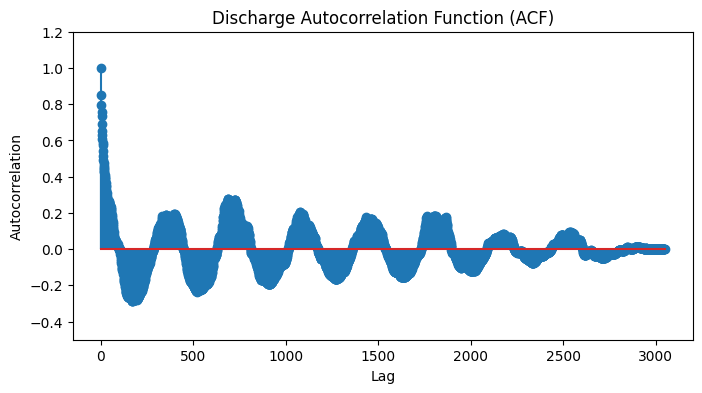

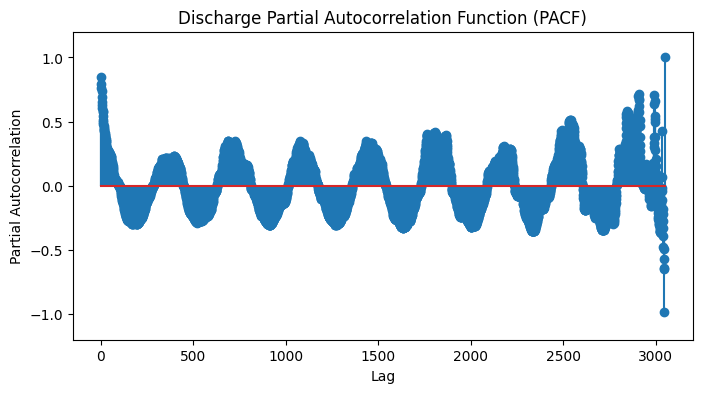

<Figure size 640x480 with 0 Axes>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def autocorrelation(data):
    n = len(data)
    variance = np.var(data)
    mean = np.mean(data)
    data = data - mean
    autocorr = np.correlate(data, data, mode='full')[-n:]
    autocorr /= autocorr[0]  # Normalize by the first lag
    return autocorr

def partial_autocorrelation(data, lag):
    x = data[:-lag]
    y = data[lag:]
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    cov = np.mean((x - mean_x) * (y - mean_y))
    var_x = np.var(x)
    pacf = cov / np.sqrt(var_x * np.var(y))
    return pacf

data = df_n
# Example discharge data
discharge_data = data['bp_discharge'].values

# Calculate autocorrelation
autocorr = autocorrelation(discharge_data)

#Calculate partial autocorrelation
max_lag = len(discharge_data) - 1
pacf = [partial_autocorrelation(discharge_data, lag) for lag in range(1, max_lag + 1)]


# Plot autocorrelation function
lag = np.arange(len(discharge_data))
plt.figure(figsize=(8, 4))
plt.stem(lag, autocorr)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Discharge Autocorrelation Function (ACF)')
plt.ylim(-.5, 1.2)  # Set y-axis limits to -1 and 1
plt.show()

# Plot partial autocorrelation function
plt.figure(figsize=(8, 4))
plt.stem(range(1, max_lag + 1), pacf)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Discharge Partial Autocorrelation Function (PACF)')
plt.ylim(-1.2, 1.2)  # Set y-axis limits to -1 and 1
plt.show()

plt.tight_layout()
plt.show()

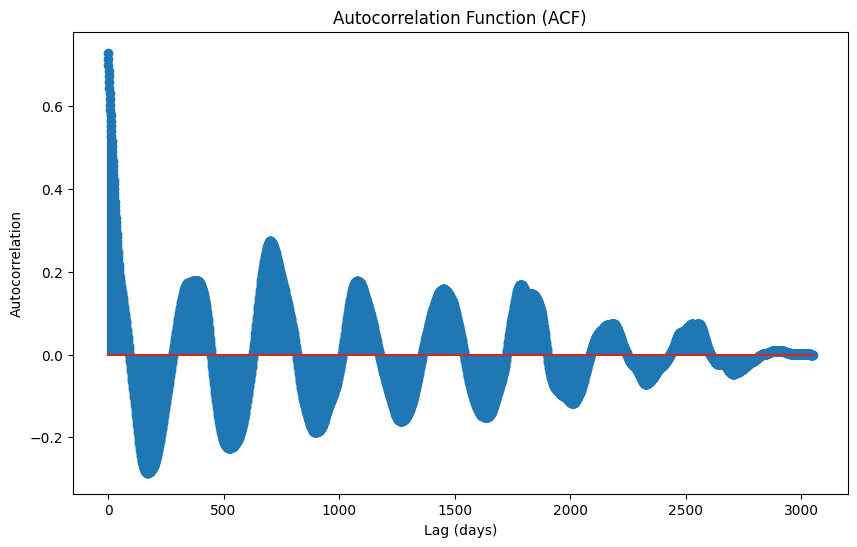

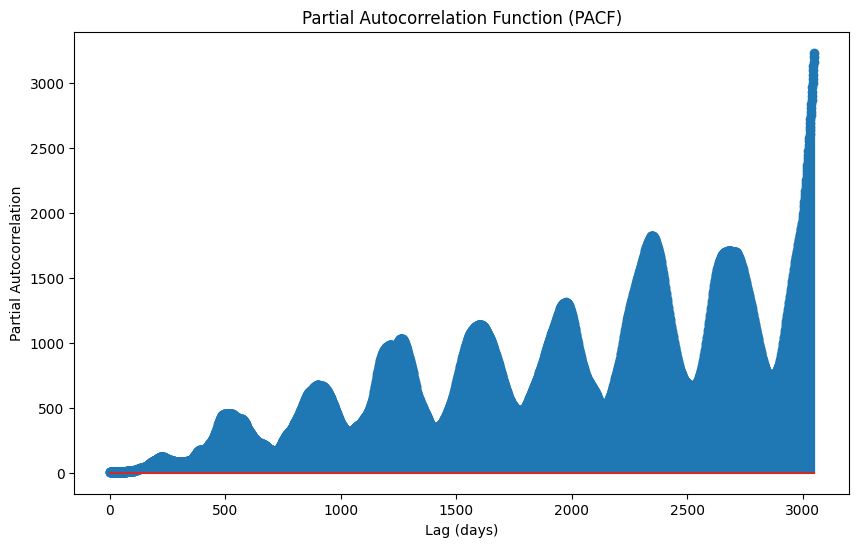

In [12]:
#autocorrelation with smoothing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def plot_acf_pacf(discharge):
    # Calculate autocorrelation values
    acf_values = np.correlate(discharge - discharge.mean(), discharge - discharge.mean(), mode='full')[-len(discharge):] / (discharge.var() * len(discharge))

    # Apply smoothing using Savitzky-Golay filter
    acf_smoothed = savgol_filter(acf_values, window_length=103, polyorder=2)

    # Plot Autocorrelation Function (ACF)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.stem(range(len(acf_smoothed)), acf_smoothed, use_line_collection=True)
    ax.set_title('Autocorrelation Function (ACF)')
    ax.set_xlabel('Lag (days)')
    ax.set_ylabel('Autocorrelation')
    plt.show()

    # Calculate partial autocorrelation values
    pacf_values = np.correlate(discharge, discharge, mode='full')[:len(discharge)]

    # Apply smoothing using Savitzky-Golay filter
    pacf_smoothed = savgol_filter(pacf_values, window_length=103, polyorder=2)

    # Plot Partial Autocorrelation Function (PACF)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.stem(range(len(pacf_smoothed)), pacf_smoothed, use_line_collection=True)
    ax.set_title('Partial Autocorrelation Function (PACF)')
    ax.set_xlabel('Lag (days)')
    ax.set_ylabel('Partial Autocorrelation')
    plt.show()

if __name__ == '__main__':
    discharge = df_n['bp_discharge'].values
    plot_acf_pacf(discharge)


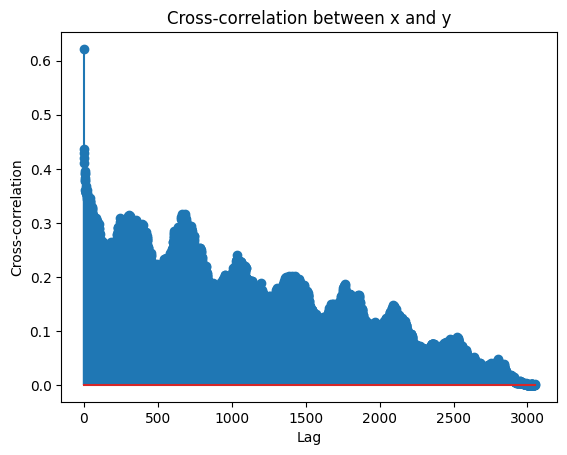

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def cross_correlation(x, y):
    n = len(x)
    cross_corr = np.correlate(x, y, mode='full')[-n:]
    cross_corr /= np.sqrt(np.sum(x**2) * np.sum(y**2))
    return cross_corr

# Example time series data
data = pd.read_csv('discharge_regression_data.csv')
x = data['rain']
y = data['bp_discharge']

# Calculate cross-correlation
cross_corr = cross_correlation(x, y)

# Plot cross-correlation
lag = np.arange(len(x))
plt.stem(lag, cross_corr)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between x and y')
plt.show()


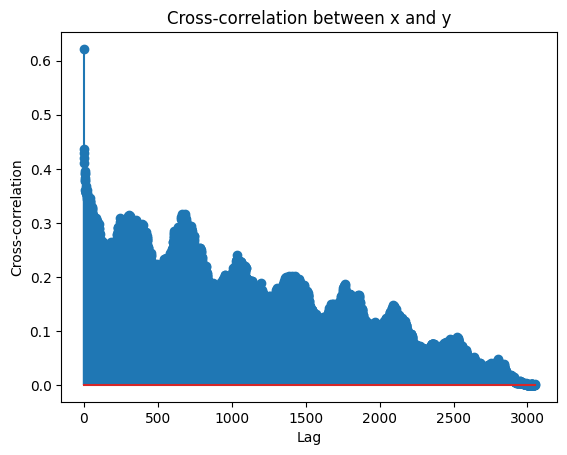

In [36]:
data = pd.read_csv('discharge_regression_data.csv')
rain = data['rain']
discharge = data['bp_discharge']

import numpy as np
import matplotlib.pyplot as plt

def cross_correlation(x, y):
    n = len(x)
    cross_corr = np.correlate(x, y, mode='full')[-n:]
    cross_corr /= np.sqrt(np.sum(x**2) * np.sum(y**2))
    return cross_corr

# Example time series data
data = pd.read_csv('discharge_regression_data.csv')
rain = data['rain']
discharge = data['bp_discharge']
x = rain
y = discharge

# Calculate cross-correlation
cross_corr = cross_correlation(x, y)

# Plot cross-correlation
lag = np.arange(len(x))
plt.stem(lag, cross_corr)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between x and y')
plt.show()


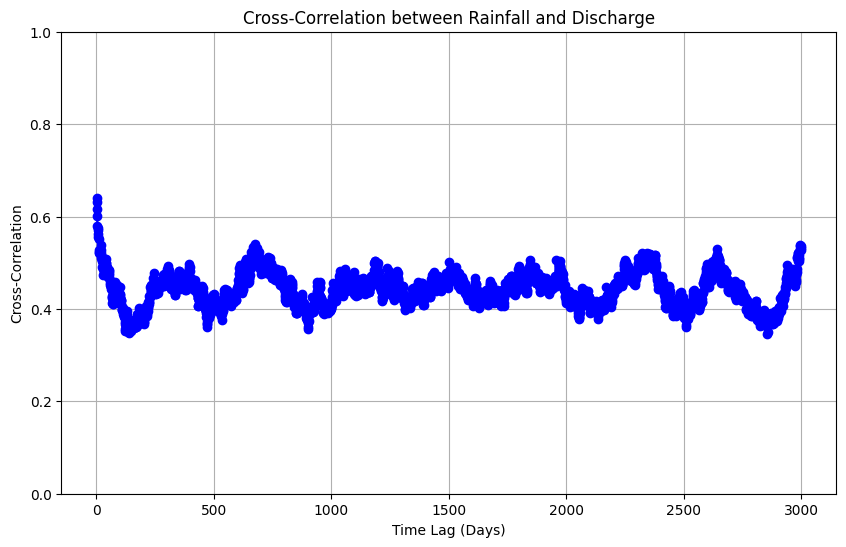

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('discharge_regression_data.csv')
rain = data['rain']
discharge = data['bp_discharge']

# Calculate cross-correlation
lags = range(1, 3000)  # Time lags from 1 to 10 days
corr_values = [np.correlate(discharge, np.roll(rain, -lag)) / (len(discharge) * np.std(discharge) * np.std(rain)) for lag in lags]

# Plot cross-correlation
plt.figure(figsize=(10, 6))
plt.plot(lags, corr_values, marker='o', linestyle='-', color='b')
plt.xlabel('Time Lag (Days)')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation between Rainfall and Discharge')
plt.ylim(0, 1)  # Set y-axis limits to -1 and 1
plt.grid(True)
plt.show()


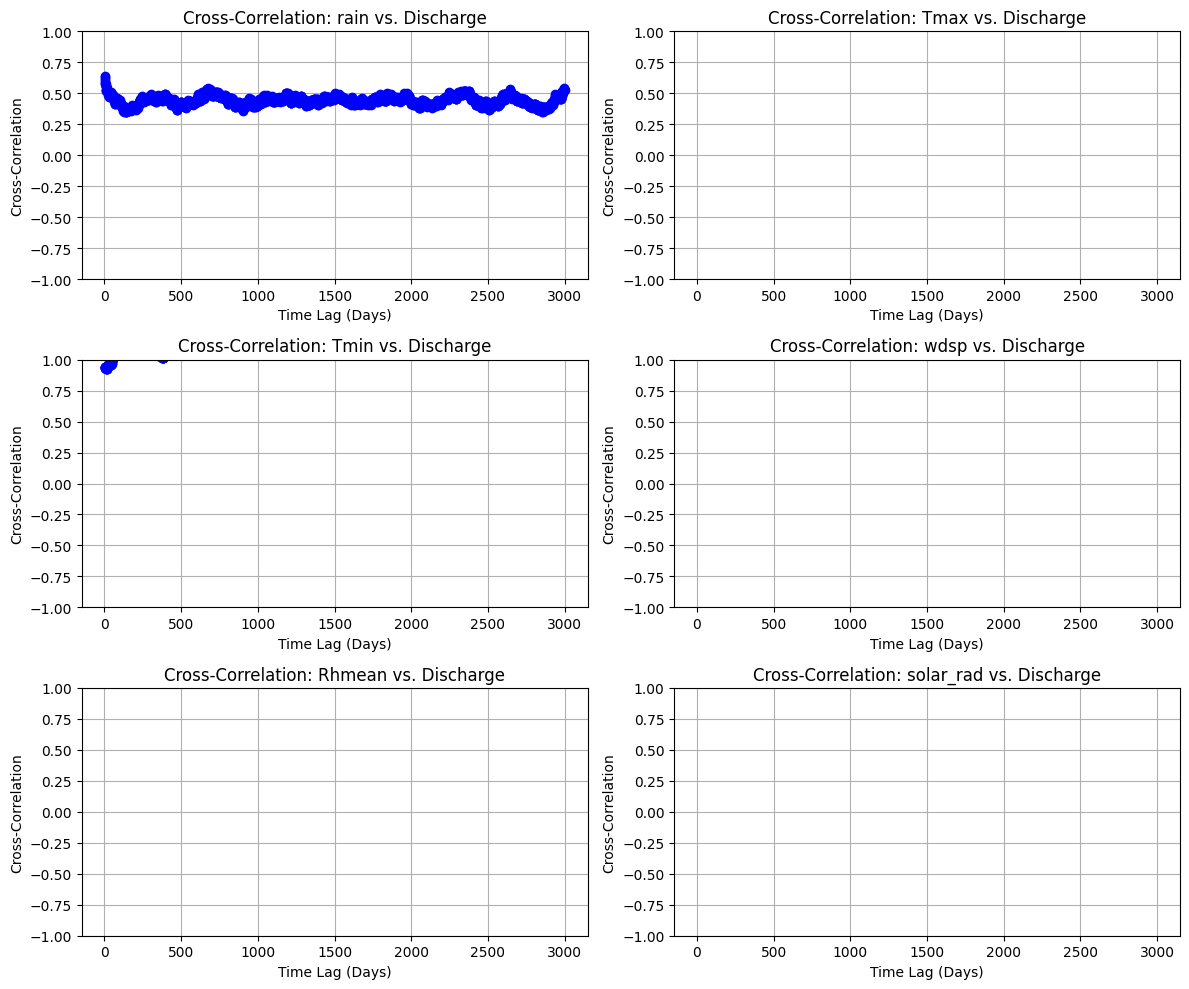

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('discharge_regression_data.csv')
features = ['rain', 'Tmax', 'Tmin', 'wdsp', 'Rhmean', 'solar_rad']
discharge = data['bp_discharge']

# Calculate cross-correlation for each feature
lags = range(1, 3000)  # Time lags from 1 to 10 days

plt.figure(figsize=(12, 10))

for i, feature in enumerate(features):
    feature_data = data[feature]
    corr_values = [np.correlate(discharge, np.roll(feature_data, -lag)) / (len(discharge) * np.std(discharge) * np.std(feature_data)) for lag in lags]
    
    # Plot cross-correlation
    plt.subplot(3, 2, i+1)
    plt.plot(lags, corr_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Time Lag (Days)')
    plt.ylabel('Cross-Correlation')
    plt.title(f'Cross-Correlation: {feature} vs. Discharge')
    plt.ylim(-1, 1)  # Set y-axis limits to -1 and 1
    plt.grid(True)

plt.tight_layout()
plt.show()


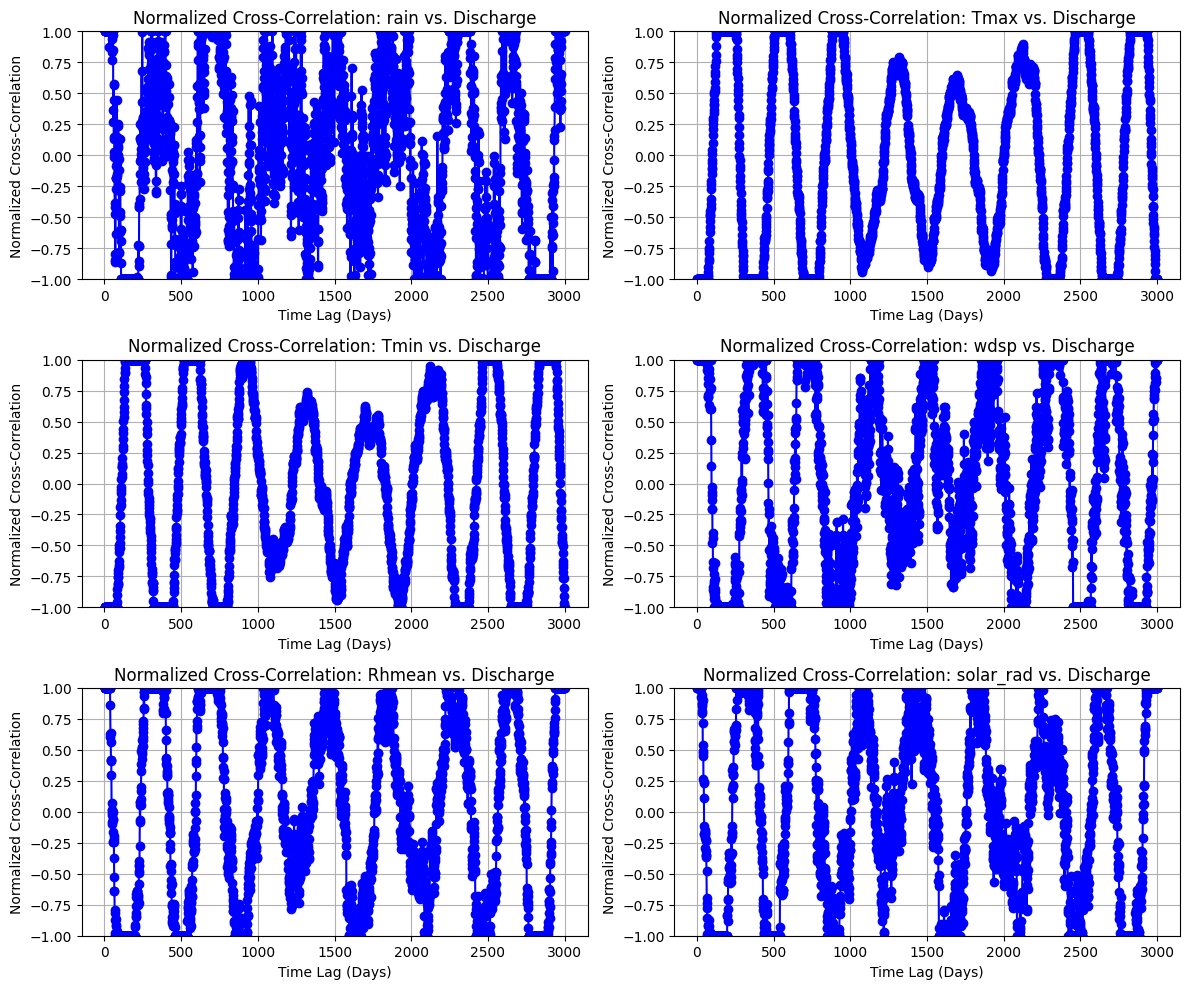

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('discharge_regression_data.csv')
features = ['rain', 'Tmax', 'Tmin', 'wdsp', 'Rhmean', 'solar_rad']
discharge = data['bp_discharge']

# Calculate cross-correlation for each feature
lags = range(1, 3000)  # Time lags from 1 to 10 days

plt.figure(figsize=(12, 10))

for i, feature in enumerate(features):
    feature_data = data[feature]
    corr_values = [np.correlate(discharge, np.roll(feature_data, -lag)) / (len(discharge) * np.std(discharge) * np.std(feature_data)) for lag in lags]
    
    # Normalize and clip cross-correlation values
    norm_corr_values = np.clip((corr_values - np.mean(corr_values)) / np.std(corr_values), -1, 1)
    
    # Plot normalized and clipped cross-correlation
    plt.subplot(3, 2, i+1)
    plt.plot(lags, norm_corr_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Time Lag (Days)')
    plt.ylabel('Normalized Cross-Correlation')
    plt.title(f'Normalized Cross-Correlation: {feature} vs. Discharge')
    plt.ylim(-1, 1)  # Set y-axis limits to -1 and 1
    plt.grid(True)

plt.tight_layout()
plt.show()


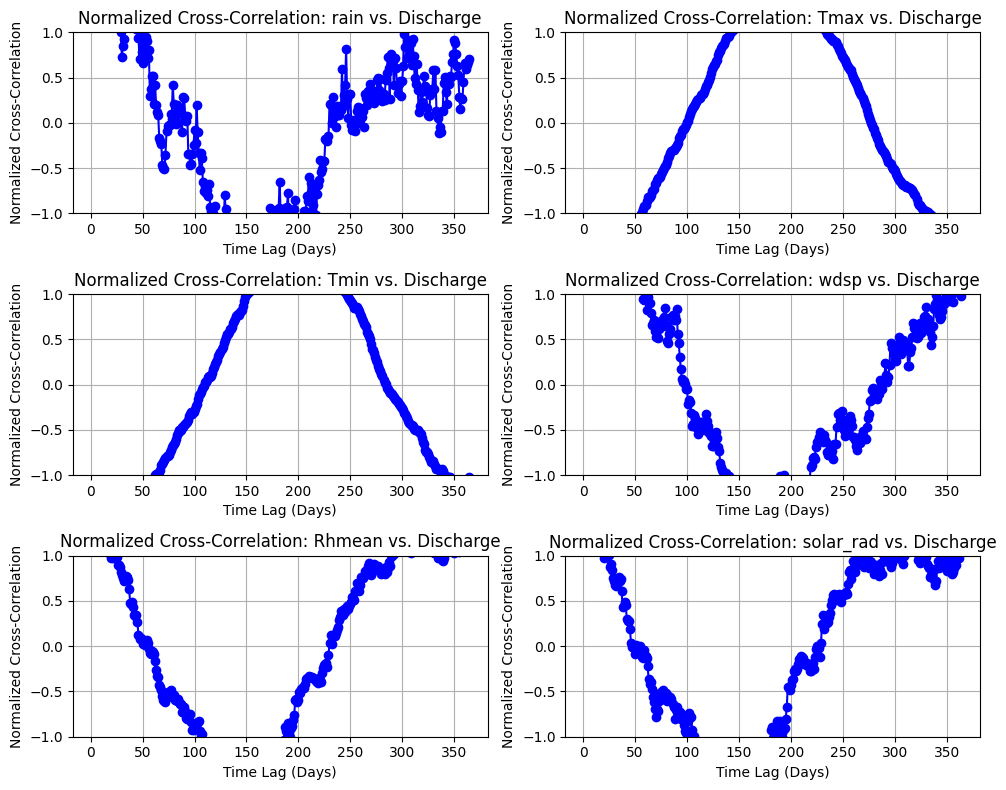

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('discharge_regression_data.csv')
features = ['rain', 'Tmax', 'Tmin', 'wdsp', 'Rhmean', 'solar_rad']
discharge = data['bp_discharge']

# Calculate cross-correlation for each feature
lags = range(1, 365)  # Time lags from 1 to 10 days

plt.figure(figsize=(10, 8))

for i, feature in enumerate(features):
    feature_data = data[feature]
    corr_values = [np.correlate(discharge, np.roll(feature_data, -lag)) / (len(discharge) * np.std(discharge) * np.std(feature_data)) for lag in lags]
    
    # Normalize cross-correlation values
    norm_corr_values = (corr_values - np.mean(corr_values)) / np.std(corr_values)
    
    # Plot normalized cross-correlation
    plt.subplot(3, 2, i+1)
    plt.plot(lags, norm_corr_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Time Lag (Days)')
    plt.ylabel('Normalized Cross-Correlation')
    plt.title(f'Normalized Cross-Correlation: {feature} vs. Discharge')
    plt.ylim(-1, 1)  # Set y-axis limits to -1 and 1
    plt.grid(True)

plt.tight_layout()
plt.show()
